### 1. Read data from ‘Personal cost medical.csv’

In [1]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

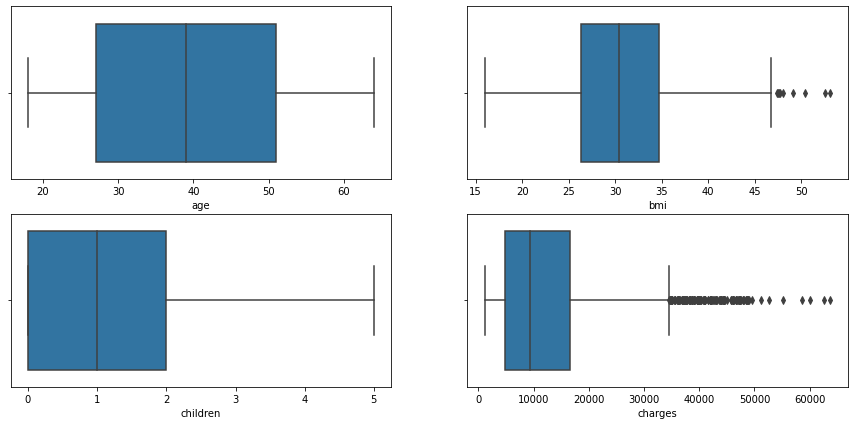

In [7]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

In [8]:
#get class data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [10]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X=pd.DataFrame(X, columns=df.columns) 
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


##### Cluster data using K-means with k=2 and then report the accuracies (SSE and Silhouette Coefficient).

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
cluster_labels = kmeans.fit_predict(X)

In [13]:
cluster_labels

array([0, 9, 9, ..., 6, 4, 0])

### 4.	What is the optimum (best) k value for the K-means model of this dataset? 

###### K-means Algorithm

In [14]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 21) # for 1 to 20 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters = k)

    # Fit model to samples
    kmeans.fit(X)

    # Append the inertia to the list of inertias
    sse.append(kmeans.inertia_)

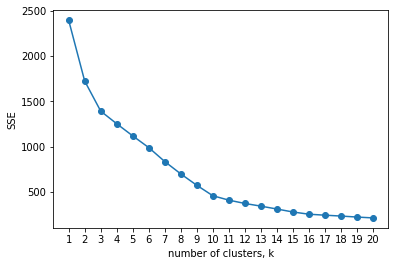

In [15]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

###### From the graph that k=15 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

In [16]:
#Applying kmeans to the dataset with the optimal k value
k = 15
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,ClusterLabels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,10
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,4
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,4


### 5.	Create an optimum K-means model with the optimal k value.

Use the optimal k value from the previos section to create a model and assign cluster label for each data sample (use .fit_predict)

In [17]:
#Applying kmeans to the dataset with the optimal k value
k = 15
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,ClusterLabels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,11
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,3
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,3
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,1


#### 5.1 What is SSE of the optimal model?

In [18]:
# Sum of Squared Error of the oprimum model
sse = kmeans.inertia_
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  276.6176461892427


#### 5.2 What is Silhouette Coefficient of the optimal model?

In [19]:
#  A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, cluster_labels)
silhouette

0.5410825582611969

In [20]:
# Number of members in each cluster
result.ClusterLabels.value_counts()

4     141
0     139
5     135
3     134
1     132
7     132
6     126
2     125
13     55
11     50
8      38
9      37
10     36
12     29
14     29
Name: ClusterLabels, dtype: int64

In [21]:
# Transform centroid data back to the original scale.
print("Centroid data:")
centriods_data = mms.inverse_transform(kmeans.cluster_centers_)
centriods_data = pd.DataFrame(centriods_data,columns=col_names)
centriods_data

Centroid data:


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.071942,32.780000,1.079137,8440.205552,1.000000e+00,1.110223e-16,1.000000e+00,-5.551115e-17,0.000000e+00,2.775558e-17,1.000000e+00,2.775558e-17
1,38.568182,28.930379,1.060606,8320.689321,-5.551115e-17,1.000000e+00,1.000000e+00,-5.551115e-17,-2.775558e-17,1.000000e+00,-5.551115e-17,5.551115e-17
2,39.216000,28.861760,1.144000,8664.042222,-1.110223e-16,1.000000e+00,1.000000e+00,-5.551115e-17,1.000000e+00,8.326673e-17,0.000000e+00,8.326673e-17
3,38.261194,34.129552,1.052239,7609.003587,-5.551115e-17,1.000000e+00,1.000000e+00,-5.551115e-17,-2.775558e-17,5.551115e-17,1.000000e+00,5.551115e-17
4,40.099291,30.050355,1.134752,8234.091260,1.000000e+00,1.110223e-16,1.000000e+00,-5.551115e-17,-5.551115e-17,2.775558e-17,0.000000e+00,1.000000e+00
5,39.755556,29.488704,1.177778,8786.998679,1.000000e+00,1.110223e-16,1.000000e+00,-5.551115e-17,-5.551115e-17,1.000000e+00,0.000000e+00,0.000000e+00
6,40.277778,31.019841,1.119048,7778.905534,-5.551115e-17,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.326673e-17,0.000000e+00,1.000000e+00
7,39.840909,29.777462,0.954545,9640.426984,1.000000e+00,1.110223e-16,1.000000e+00,-5.551115e-17,1.000000e+00,5.551115e-17,0.000000e+00,5.551115e-17
8,37.868421,29.560000,0.894737,30926.252583,-5.551115e-17,1.000000e+00,-1.110223e-16,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,35.567568,31.502703,1.297297,32598.862854,-1.110223e-16,1.000000e+00,1.110223e-16,1.000000e+00,-2.775558e-17,-5.551115e-17,0.000000e+00,1.000000e+00
